# Identify Fraud from Enron Data - Further Exploration and Analysis

**By: Christian Guzman**

## Introduction

This report is on the Enron data that was processed as part of the Udacity final project. The goal of this  is to use different techniques in the data exploration and analysis phases to draw new insights from the data, as well as to further develop machine learning techniques. I will attempt to invoke many of the techniques I learned throughout the course.

In [3]:
import sys
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data



## Data Wrangling

In [4]:
financial_features = ['salary', 'deferral_payments', 'total_payments', 
                      'loan_advances', 'bonus', 'restricted_stock_deferred', 
                      'deferred_income', 'total_stock_value', 'expenses', 
                      'exercised_stock_options', 'other', 
                      'long_term_incentive', 'restricted_stock', 
                      'director_fees'] # all units are in US dollars.

email_features = ['to_messages', 'from_poi_to_this_person', 
                  'from_messages', 'from_this_person_to_poi', 
                  'shared_receipt_with_poi'] # units are generally number of 
                                             # emails messages; notable 
                                             # exception is ‘email_address’, 
                                             # which is a text string.

poi_label = ['poi'] # boolean 1 for person of interest, 0 for not.

features_list = financial_features + email_features
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [5]:
len(features_list)

19

There 19 features in the variable

In [6]:
data_dict['ALLEN PHILLIP K']

{'bonus': 4175000,
 'deferral_payments': 2869717,
 'deferred_income': -3081055,
 'director_fees': 'NaN',
 'email_address': 'phillip.allen@enron.com',
 'exercised_stock_options': 1729541,
 'expenses': 13868,
 'from_messages': 2195,
 'from_poi_to_this_person': 47,
 'from_this_person_to_poi': 65,
 'loan_advances': 'NaN',
 'long_term_incentive': 304805,
 'other': 152,
 'poi': False,
 'restricted_stock': 126027,
 'restricted_stock_deferred': -126027,
 'salary': 201955,
 'shared_receipt_with_poi': 1407,
 'to_messages': 2902,
 'total_payments': 4484442,
 'total_stock_value': 1729541}

The above is an example data point of employee Phillip K Allen.

In [7]:
df = pd.DataFrame.from_dict(data_dict, orient='index')
df.replace(to_replace='NaN', value=np.nan, inplace=True)

In [8]:
df = df[features_list]
df.head()

,salary,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,exercised_stock_options,other,long_term_incentive,restricted_stock,director_fees,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi
ALLEN PHILLIP K,201955.0,2869717.0,4484442.0,NaN,4175000.0,-126027.0,-3081055.0,1729541.0,13868.0,1729541.0,152.0,304805.0,126027.0,NaN,2902.0,47.0,2195.0,65.0,1407.0
BADUM JAMES P,NaN,178980.0,182466.0,NaN,NaN,NaN,NaN,257817.0,3486.0,257817.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477.0,NaN,916197.0,NaN,NaN,-560222.0,-5104.0,5243487.0,56301.0,4046157.0,864523.0,NaN,1757552.0,NaN,566.0,39.0,29.0,0.0,465.0
BAXTER JOHN C,267102.0,1295738.0,5634343.0,NaN,1200000.0,NaN,-1386055.0,10623258.0,11200.0,6680544.0,2660303.0,1586055.0,3942714.0,NaN,NaN,NaN,NaN,NaN,NaN
BAY FRANKLIN R,239671.0,260455.0,827696.0,NaN,400000.0,-82782.0,-201641.0,63014.0,129142.0,NaN,69.0,NaN,145796.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
### Count number of null, and negative values for each column
# Number of nan
# ex: np.isnan(df['salary']).values.sum()
print "Number of null values"
for col in df.columns:
    val = np.isnan(df[col]).values.sum()
    print col.upper() +":", val, ";", \
    round(float(val) / float(len(df)) * 100, 2), "%"

Number of null values
SALARY: 51 ; 34.93 %
DEFERRAL_PAYMENTS: 107 ; 73.29 %
TOTAL_PAYMENTS: 21 ; 14.38 %
LOAN_ADVANCES: 142 ; 97.26 %
BONUS: 64 ; 43.84 %
RESTRICTED_STOCK_DEFERRED: 128 ; 87.67 %
DEFERRED_INCOME: 97 ; 66.44 %
TOTAL_STOCK_VALUE: 20 ; 13.7 %
EXPENSES: 51 ; 34.93 %
EXERCISED_STOCK_OPTIONS: 44 ; 30.14 %
OTHER: 53 ; 36.3 %
LONG_TERM_INCENTIVE: 80 ; 54.79 %
RESTRICTED_STOCK: 36 ; 24.66 %
DIRECTOR_FEES: 129 ; 88.36 %
TO_MESSAGES: 60 ; 41.1 %
FROM_POI_TO_THIS_PERSON: 60 ; 41.1 %
FROM_MESSAGES: 60 ; 41.1 %
FROM_THIS_PERSON_TO_POI: 60 ; 41.1 %
SHARED_RECEIPT_WITH_POI: 60 ; 41.1 %


In [10]:
# Number of negative
print "Number of negative values"
for col in df.columns:
    ctr = 0
    for elem in df[col]:
        if elem < 0:
            ctr += 1
    p = round(float(ctr) / float(len(df)) * 100, 2)
    if p > 1.00:
        print col.upper() + ":", ctr, ";", p, "%", "*"
    else:
        print col.upper() + ":", ctr, ";", p, "%"
print "\n\"*\"" + " More than 1% of values are negative."

Number of negative values
SALARY: 0 ; 0.0 %
DEFERRAL_PAYMENTS: 1 ; 0.68 %
TOTAL_PAYMENTS: 0 ; 0.0 %
LOAN_ADVANCES: 0 ; 0.0 %
BONUS: 0 ; 0.0 %
RESTRICTED_STOCK_DEFERRED: 16 ; 10.96 % *
DEFERRED_INCOME: 49 ; 33.56 % *
TOTAL_STOCK_VALUE: 1 ; 0.68 %
EXPENSES: 0 ; 0.0 %
EXERCISED_STOCK_OPTIONS: 0 ; 0.0 %
OTHER: 0 ; 0.0 %
LONG_TERM_INCENTIVE: 0 ; 0.0 %
RESTRICTED_STOCK: 1 ; 0.68 %
DIRECTOR_FEES: 0 ; 0.0 %
TO_MESSAGES: 0 ; 0.0 %
FROM_POI_TO_THIS_PERSON: 0 ; 0.0 %
FROM_MESSAGES: 0 ; 0.0 %
FROM_THIS_PERSON_TO_POI: 0 ; 0.0 %
SHARED_RECEIPT_WITH_POI: 0 ; 0.0 %

"*" More than 1% of values are negative.


Restricted Stock Deferred, and Deferred Income were the only features with more than 1% negative values. They each had approximately 11% and 34% respectively.

For data imputation a feature like salary should more than likely never be zero since an employee would not work for 0 income. In this case I replace the missing values with the median. The missing values of other features could be replaced with zero. For example an employee could have zero director's fees since it is realistic for most employees to not be directors.

In [11]:
if False:
    # Remove negative numbers
    for col in df.columns:
        if type(df[col][0]) == np.float64:
            df[col] = df[col].abs()

In [12]:
df['salary'].describe()

count    9.500000e+01
mean     5.621943e+05
std      2.716369e+06
min      4.770000e+02
25%      2.118160e+05
50%      2.599960e+05
75%      3.121170e+05
max      2.670423e+07
Name: salary, dtype: float64

In [13]:
df['salary'].isnull().sum()

51

In [14]:
# Remove NaN values.
def impute(column, strat='median'):
    strats = {}
    strats['mean'] = column.mean()
    strats['median'] = column.median()
    strats['mode'] = column.mode()
    for i in range(len(column)):
        if np.isnan(column[i]):
            column[i] = strats[strat]
    return column

In [17]:
for elem in df.columns:
    df[elem] = impute(df[elem])

## Exploratory Analysis

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df['salary'].describe()

count    1.460000e+02
mean     4.566319e+05
std      2.191873e+06
min      4.770000e+02
25%      2.398005e+05
50%      2.599960e+05
75%      2.708505e+05
max      2.670423e+07
Name: salary, dtype: float64

In [34]:
df['salary'].min()

477.0

In [35]:
df['salary'].max()

26704229.0

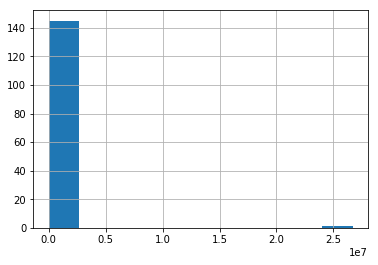

In [36]:
df['salary'].hist()

Looking at the distribution for the response variable 'salary' there is an obvious outlier. A salary of 26 million seems to excessive, and further research can reveal the cause of this outlier.

In [39]:
%%html
<img src="images/salary-outlier.JPG">

The outlier was caused by the data collection as the value is actually the total sum of all salaries. There is also data point named "The Travel Agency in the Park" which is not an employee and will also be removed from the data.

In [58]:
print df.index.get_loc('TOTAL'),";", df.index.get_loc('THE TRAVEL AGENCY IN THE PARK')


130 ; 127


In [67]:
# Ref: http://erikrood.com/Python_References/dropping_rows_cols_pandas.html
if 'TOTAL' in df.index:
    df.drop('TOTAL', axis=0, inplace=True)
if 'THE TRAVEL AGENCY IN THE PARK' in df.index:
    df.drop('THE TRAVEL AGENCY IN THE PARK', axis=0, inplace=True)

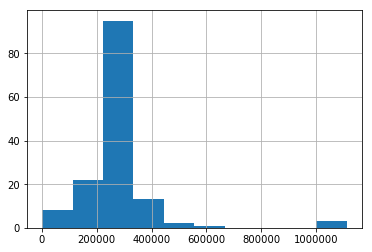

In [70]:
df['salary'].hist()